In [ ]:
# Packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv("/content/drive/MyDrive/Post Undergrad/CS 5262: Machine Learning/train_data.csv")
df = pd.DataFrame(train_data)
test_data = pd.read_csv("/content/drive/MyDrive/Post Undergrad/CS 5262: Machine Learning/test_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Edit Data file train
dfx = df.copy()
X = dfx.drop("disease_status",axis=1)
X = X.drop("File_ID",axis=1)
X = X.drop("tSNE_1",axis=1)
X = X.drop("tSNE_2",axis=1)
y = df.iloc[:,44:]
X =  pd.DataFrame(X)
y = pd.DataFrame(y)
# Edit Data file test
test_datax = test_data.copy()
Xtest = dfx.drop("disease_status",axis=1)
Xtest = Xtest.drop("File_ID",axis=1)
Xtest = Xtest.drop("tSNE_1",axis=1)
Xtest = Xtest.drop("tSNE_2",axis=1)
ytest = test_data.iloc[:,44:]
print(ytest)

       File_ID  disease_status
0           31               0
1           31               0
2           31               0
3           31               0
4           31               0
...        ...             ...
46723       27               1
46724       27               1
46725       26               1
46726       16               1
46727       17               1

[46728 rows x 2 columns]


In [ ]:
# Complete PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = .90)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(test_data.iloc[:,:42])
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.columns = ["PC1","PC2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16","PCA17","PCA18","PCA19"]
test = X_test_pca.join(test_data.iloc[:,44:])

In [ ]:
# Display how we chose number of PC
explained_variance = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance)*100)
plt.axhline(y = 90, color = 'r', linestyle = '--')
plt.axvline(x = 19, color = 'r', linestyle = '--')
plt.xticks(range(0,25))
plt.xlabel('Number of Components')
plt.ylabel("Explained Variance")
plt.title("Relationship Between Explained Variance Compared to Number of Components")

In [ ]:
print(X_test_pca)

[[-3.47668479  0.47759261 -2.2024869  ... -0.98581504  0.34509666
   0.5835511 ]
 [-3.61722833 -3.13237042  1.01517949 ...  1.22284276 -0.0899537
  -1.09302956]
 [-2.96937063  4.945405   -3.5902274  ...  1.07003316 -0.25418378
  -0.84175575]
 ...
 [ 6.67299589 -2.3836825   0.33728148 ... -0.63637752  0.37846699
   0.59894956]
 [ 5.95256075 -2.03862018 -0.79335952 ...  0.53832983  1.14124214
  -0.19728737]
 [-5.8642566  -1.15409248  2.71288561 ...  0.2394869  -0.54659724
  -0.17268349]]


In [ ]:
for i, marker in enumerate(train_data.columns):
    fig, ax = plt.subplots()
    plt.scatter(X_train_pca.PC1, X_train_pca.PC2, c=train_data.iloc[:,i], s=5)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title("T cells")
    ax.set_aspect('equal')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(marker, rotation=270,labelpad=15)

    plt.show()

In [ ]:
# All cells
sns.scatterplot(data=X_train_pca_wdisease.loc[X_train_pca_wdisease['disease_status']!=2],
                x='PC1', y='PC2', s=5, hue='disease_status')
plt.legend([],[], frameon=False)
plt.title('All Cells')
ax.set_aspect('equal')
plt.show()

#healthy cells
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_pca_wdisease.loc[X_train_pca_wdisease['disease_status']==0],
                x='PC1', y='PC2', s=5, hue='disease_status')
plt.legend([],[], frameon=False)
plt.title('Healthy Controls')
ax.set_aspect('equal')
plt.show()

#COVID cells
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_pca_wdisease.loc[X_train_pca_wdisease['disease_status']==1],
                x='PC1', y='PC2', s=5, hue='disease_status')
plt.legend([],[], frameon=False)
plt.title('COVID-19 Patients')
ax.set_aspect('equal')
plt.show()

In [ ]:
# train data with disease status and file id
X_train_pca_wdisease = pd.DataFrame(X_train_pca)
X_train_pca_wdisease = X_train_pca_wdisease.join(y)
X_train_pca_wdisease.columns = ["PC1","PC2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16","PCA17","PCA18","PCA19","File_ID","disease_status"]

# Test data with disease status and file id
X_test_pca_wdisease = pd.DataFrame(test)
X_test_pca_wdisease.columns = ["PC1","PC2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16","PCA17","PCA18","PCA19","File_ID","disease_status"]

In [ ]:
#k-means clustering with cross-validation on the training set
clustered_data = X_train_pca_wdisease.copy()
different_cells = pd.DataFrame(columns=['k', 'different cells'])
for k in range(5, 65, 5): #test k values from 5 to 65, increasing by 5
    print(k)
    #perform k-means clustering
    km = KMeans(n_clusters=k)
    clustered_data['cluster'] = km.fit_predict(clustered_data.iloc[:,0:19]) #perform clustering on t-SNE axes from training set

    #calculate what proportion of each cluster comes from healthy/covid patients
    group_abundances = np.zeros((2,k)) #first row stores healthy proportion, second row stores covid proportion
    difference = [] #will keep track of the difference in proportion between the two disease groups
    diff_cells = 0 #count how many cells are in clusters that are specific to one disease group

    #loop through each cluster
    for cluster in sorted(clustered_data['cluster'].unique()):
        cluster_count = (clustered_data['cluster'] == cluster).sum() #how many cells in this cluster

        #calculate what proportion of each cluster comes from healthy/covid patients
        healthy_percent = ((clustered_data['cluster']==cluster) & (clustered_data['disease_status'] == 0)).sum()/cluster_count*100
        covid_percent = ((clustered_data['cluster']==cluster) & (clustered_data['disease_status'] == 1)).sum()/cluster_count*100

        #first row stores healthy proportion, second row stores covid proportion
        group_abundances[0, cluster] = healthy_percent
        group_abundances[1, cluster] = covid_percent

        #calculate difference in proportion between the two groups
        r = abs(healthy_percent-covid_percent) #r = range
        difference.append(r)
        if r > 70: #difference of 70 = 85th percentile; a large difference between the two groups
            diff_cells = diff_cells + cluster_count
    #add to dataframe
    different_cells = pd.concat([different_cells, pd.DataFrame([[k, diff_cells]], columns=['k', 'different cells'])])
#re-index
df = different_cells.reset_index(drop=True)

#plot cross-validation results
fig, ax = plt.subplots()
g = sns.lineplot(data=df,
                    x='k', y='different cells')
plt.title('k-means cross validation')
plt.show()

#determine how stable each k is (does it change a lot jumping to the previous or next k value?)
avg_change = 0
stability = pd.DataFrame(columns=['k', 'average change'])
for i in range(1, (len(different_cells)-1)):
    avg_change = (abs(df.iloc[i,1]-df.iloc[i-1,1]) + abs(df.iloc[i,1]-df.iloc[i+1,1]))/2
    stability = pd.concat([stability, pd.DataFrame([[df.iloc[i,0], avg_change]], columns=['k', 'average change'])])

stability.loc[(stability['average change'] == stability['average change'].min()), :]

In [ ]:
#k-means optimization plot
fig, ax = plt.subplots()
x = [45,45,50,50,50,55]
y = [56622,51364,55042,55419,55517,55996]
plt.plot(x,y)
plt.xlabel('k')
plt.ylabel('# of status-specific cells identified')
plt.title('Optimizing k for k-means clustering')

In [ ]:
for i in df['different cells']:
    print(i)

36626
49096
45996
49435
51364


In [ ]:
#combine training and testing set for clustering (will split back out to perform classification)
split_ind = len(X_train_pca_wdisease) #this index will be used to split back into training and testing sets after clustering
final_clustering = pd.concat([X_train_pca_wdisease.iloc[:,:],X_test_pca_wdisease.iloc[:,:]])
final_clustering = final_clustering.reset_index(drop=True)
final_clustering

,PC1,PC2,PCA3,PCA4,PCA5,...,PCA17,PCA18,PCA19,File_ID,disease_status
0,-3.476685,0.477593,-2.202487,-0.026963,0.071947,...,-0.985815,0.345097,0.583551,32,0
1,-3.617228,-3.132370,1.015179,0.473693,-1.735171,...,1.222843,-0.089954,-1.093030,32,0
2,-2.969371,4.945405,-3.590227,0.380942,1.515383,...,1.070033,-0.254184,-0.841756,32,0
3,-5.321872,-0.678593,1.045415,-1.608166,0.556027,...,-0.255760,-0.094678,-0.145920,32,0
4,-4.168992,-3.837108,0.302091,1.098154,-1.489846,...,-1.900075,0.691900,-0.115805,32,0
...,...,...,...,...,...,...,...,...,...,...,...
255235,-3.923201,-4.490558,2.107046,0.361813,-2.443016,...,-0.965557,0.143121,0.146782,27,1
255236,6.504190,-1.620971,0.425800,-1.590910,0.029881,...,-1.495366,0.617554,-0.246559,27,1
255237,1.731255,4.385363,1.066837,-2.250015,-2.062843,...,0.700542,-0.460588,-1.100424,26,1
255238,6.104070,-2.361998,1.100090,-0.555060,1.238457,...,-1.301008,0.541734,-0.666112,16,1


In [ ]:
optimized_k = 50
#final patient classification
km = KMeans(n_clusters=optimized_k)
final_clustering['cluster'] = km.fit_predict(final_clustering.iloc[:,:19]) #perform clustering on training and validation sets

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:864: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._tol = _tolerance(X, self.tol)


In [ ]:
#plot clusters
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=optimized_k) #set color palette

fig, ax = plt.subplots()
g = sns.scatterplot(data=final_clustering,
                    x='PC1', y='PC2',
                    s=5, hue='cluster',
                    legend='full', palette=palette)
plt.title(str(optimized_k) + ' clusters')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set_aspect('equal')
plt.show()

interesting clusters: [9, 14, 22, 30, 32, 36, 40]


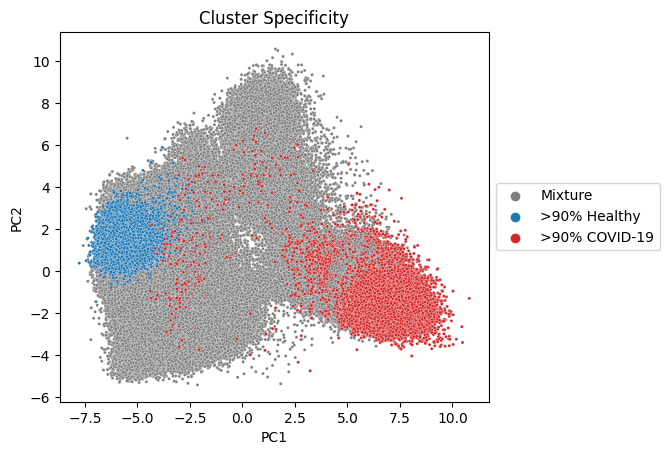

In [ ]:
clustered_train_data = final_clustering.iloc[:split_ind,:]
clustered_test_data = final_clustering.iloc[split_ind:,:]
#disease-specific population plot
optimized_k = 50
clust_spec = pd.DataFrame(columns=['cluster', 'specificity'])

#calculate what proportion of each cluster comes from healthy/covid patients
group_abundances = np.zeros((2,optimized_k)) #first row stores healthy proportion, second row stores covid proportion
difference = [] #will keep track of the difference in proportion between the two disease groups
diff_cells = 0 #count how many cells are in clusters that are specific to one disease group

#loop through each cluster
for cluster in sorted(final_clustering['cluster'].unique()):
    cluster_count = (final_clustering['cluster'] == cluster).sum() #how many cells in this cluster

    #calculate what proportion of each cluster comes from healthy/covid patients
    healthy_percent = ((final_clustering['cluster']==cluster) & (final_clustering['disease_status'] == 0)).sum()/cluster_count*100
    covid_percent = ((final_clustering['cluster']==cluster) & (final_clustering['disease_status'] == 1)).sum()/cluster_count*100

    #first row stores healthy proportion, second row stores covid proportion
    group_abundances[0, cluster] = healthy_percent
    group_abundances[1, cluster] = covid_percent

    #calculate difference in proportion between the two groups
    r = healthy_percent-covid_percent #r = range
    difference.append(r)
    if r > 80: #difference of 80 = 90th percentile for healthy
        clust_spec = pd.concat([clust_spec, pd.DataFrame([[cluster, '>90% Healthy']], columns=['cluster', 'specificity'])])
    elif r < -80: #difference of 80 = 90th percentilefor covid
        clust_spec = pd.concat([clust_spec, pd.DataFrame([[cluster, '>90% COVID-19']], columns=['cluster', 'specificity'])])
    else:
        clust_spec = pd.concat([clust_spec, pd.DataFrame([[cluster, 'Mixture']], columns=['cluster', 'specificity'])])

combo = final_clustering.merge(clust_spec, on='cluster')
#print interesting cluster numbers
not_mixture = combo.loc[combo['specificity'] != 'Mixture']
interesting_clusters = not_mixture['cluster'].unique()
print('interesting clusters:', sorted(interesting_clusters))

# cluster specific plot
pal = {'>90% Healthy':"tab:blue",
       '>90% COVID-19':"tab:red",
       'Mixture':"tab:gray"}

fig, ax = plt.subplots()
g = sns.scatterplot(data=combo,
                    x='PC1', y='PC2',
                    s=5, hue='specificity',
                    legend='full', palette=pal) #set color palette) #set color palette)
plt.title('Cluster Specificity')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set_aspect('equal')
plt.show()

In [ ]:
combo = pd.DataFrame(combo)
combo.loc[combo['specificity'] == '>90% Healthy']

In [ ]:
#describe COVID-19 specific populations

#combine cluster data with expression data
all_train_data = X.merge(clustered_train_data, on=['File_ID', 'disease_status'])
all_test_data = X_test.merge(clustered_test_data, on=['File_ID', 'disease_status'])
all_data = pd.concat([all_train_data, all_test_data]).reset_index(drop=True)


#get median of each column
medians = all_data.median(axis=0)

#find interesting cluster markers that are greater than the median
threshold = 1.5
d = {} #dictionary to store enriched markers
#loop through each interesting cluster
for clust in sorted(interesting_clusters):
    #print(clust)
    d[clust] = []
    clust_data = all_data.loc[all_data['cluster'] == clust]
    clust_medians = clust_data.median(axis=0)
    clust_cell_count = len(clust_data)

    #loop through each marker
    for name, val in clust_medians[:-5].iteritems():
        diff = clust_medians[name] - medians[name]
        if diff >= threshold:
            #print(name, 'is enriched on cluster', clust)
            d[clust].append(name)
        #elif diff <= -threshold:
            #print(name, 'is lacking on cluster', clust)

#report
for key in d.keys():
    if '170Er_CD3' in d[key]:
        print('cluster', key, 'contains', len(all_data.loc[all_data['cluster'] == key]), 'T cells')
    if '172Yb_CD66b' in d[key]:
        print('cluster', key, 'contains', len(all_data.loc[all_data['cluster'] == key]), 'neutrophils')
    if '171Yb_CD20' in d[key]:
        print('cluster', key, 'contains', len(all_data.loc[all_data['cluster'] == key]), 'B cells')
    if '168Er_CD14' in d[key]:
        print('cluster', key, 'contains', len(all_data.loc[all_data['cluster'] == key]), 'monocytes')
    if '163Dy_CD56' in d[key]:
        print('cluster', key, 'contains', len(all_data.loc[all_data['cluster'] == key]), 'NK cells')
print()

In [ ]:
df = pd.DataFrame(np.abs(pca.components_.T))
df.idxmax()

0     34
1     15
2     20
3     36
4     13
5     11
6     20
7     25
8     20
9     15
10     2
11    21
12    26
13    37
14    28
15    41
16    40
17    27
18    16
dtype: int64

In [ ]:
#define classes/functions
'''
Calculate mmodel performance accuracy
@param y (np.ndarray) - actual classes for the data points
       pred_y (np.ndarray) - predicted classes for the data points
@return prediction accuracy (float)
'''
def evaluate(y, pred_y):
    accuracy = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y[i]: #increase accuracy score if the predicted value of y is equal to the actual value of y
            accuracy += 1
        else:
            pass
    return accuracy*100/len(pred_y) #put on a 0-100% scale

In [ ]:
clustered_train_data = final_clustering
#get cluster abundance for each training set patient
file_list = []
train_cluster_abundance = np.zeros((len(clustered_train_data['File_ID'].unique()),optimized_k))
sample_count = 0
for file in sorted(clustered_train_data['File_ID'].unique()):
    if file < 31: #covid
        file_list.append(1)
    else: #healthy
        file_list.append(0)
    sample_cell_count = (clustered_train_data['File_ID'] == file).sum() #calculate the total number of cells from this sample
    cluster_count = 0
    for cluster in sorted(clustered_train_data['cluster'].unique()):
        cluster_cell_count = ((clustered_train_data['File_ID']==file) & (clustered_train_data['cluster']==cluster)).sum()
        percent = cluster_cell_count/sample_cell_count*100
        train_cluster_abundance[sample_count,cluster_count] = percent
        cluster_count += 1
    sample_count += 1
train_targets = np.array(file_list) #0 = healthy, 1=covid


#get cluster abundance for each test set patient
file_list = []
sample_count = 0
test_cluster_abundance = np.zeros((len(clustered_test_data['File_ID'].unique()),optimized_k))
for file in sorted(clustered_test_data['File_ID'].unique()):
    if file < 31: #covid
        file_list.append(1)
    else: #healthy
        file_list.append(0)
    sample_cell_count = (clustered_test_data['File_ID'] == file).sum() #calculate the total number of cells from this sample
    cluster_count = 0
    for cluster in sorted(clustered_test_data['cluster'].unique()):
        cluster_cell_count = ((clustered_test_data['File_ID']==file) & (clustered_test_data['cluster']==cluster)).sum()
        percent = cluster_cell_count/sample_cell_count*100
        test_cluster_abundance[sample_count,cluster_count] = percent
        cluster_count += 1
    sample_count += 1
test_targets = np.array(file_list) #0 = healthy, 1=covid



#split features and targets
train_x = train_cluster_abundance
train_y = train_targets
test_x = test_cluster_abundance
test_y = test_targets

#determine classification accuracy with SVM
from sklearn.svm import SVC
model = SVC(C=1, gamma=1, kernel='rbf')
model.fit(train_x, train_y)
train_acc = evaluate(train_y, model.predict(train_x))
test_acc = evaluate(test_y, model.predict(test_x))

print('training accuracy: ', train_acc)
print('test accuracy: ', test_acc)

training accuracy:  100.0
test accuracy:  100.0


In [ ]:
model.predict(test_x)

array([1, 1, 1, 1, 1, 1, 0, 0])